In [1]:
import pandas as pd
df=pd.read_csv("d:/learn/python_statistic/data/rides2.csv")
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


In [2]:
df.columns

Index(['weekend', 'num.child', 'distance', 'rides', 'games', 'wait', 'clean',
       'overall'],
      dtype='object')

In [3]:
df.shape

(500, 8)

In [4]:
df.describe()

,weekend,num.child,distance,rides,games,wait,clean,overall
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,0.482000,1.738000,31.047509,85.84600,78.666000,69.896000,87.898000,0.510000
std,0.500176,1.495938,33.145445,5.46278,8.123202,10.770757,5.115068,0.500401
min,0.000000,0.000000,0.526723,72.00000,57.000000,40.000000,74.000000,0.000000
25%,0.000000,0.000000,10.318091,82.00000,73.000000,62.000000,84.000000,0.000000
50%,0.000000,2.000000,19.019093,86.00000,78.000000,70.000000,88.000000,1.000000
75%,1.000000,3.000000,39.582050,90.00000,85.000000,77.000000,91.000000,1.000000
max,1.000000,5.000000,239.192134,100.00000,100.000000,100.000000,100.000000,1.000000


In [3]:
df.groupby("overall").mean()

,weekend,num.child,distance,rides,games,wait,clean
overall,,,,,,,
0,0.502041,1.257143,29.079426,83.363265,75.718367,65.208163,85.355102
1,0.462745,2.200000,32.938412,88.231373,81.498039,74.400000,90.341176


Text(0, 0.5, '빈도')

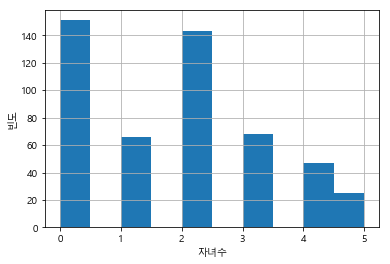

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)

df["num.child"].hist()
plt.xlabel("자녀수")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

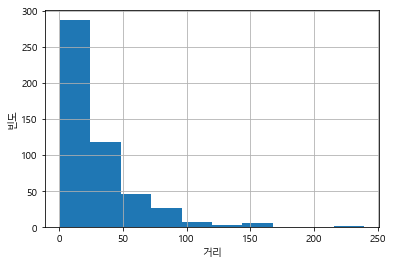

In [6]:
df["distance"].hist()
plt.xlabel("거리")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

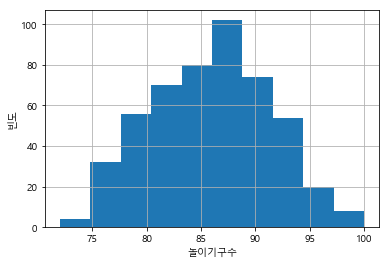

In [7]:
df["rides"].hist()
plt.xlabel("놀이기구수")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

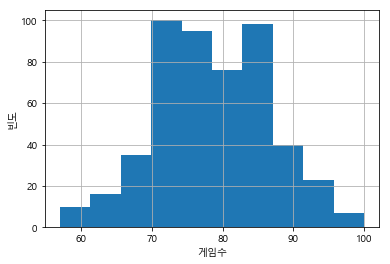

In [8]:
df["games"].hist()
plt.xlabel("게임수")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

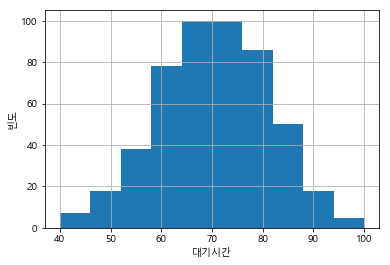

In [9]:
df["wait"].hist()
plt.xlabel("대기시간")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

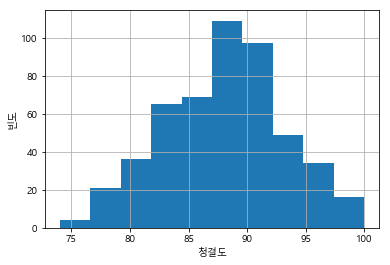

In [10]:
df["clean"].hist()
plt.xlabel("청결도")
plt.ylabel("빈도")

Text(0, 0.5, '만족횟수')

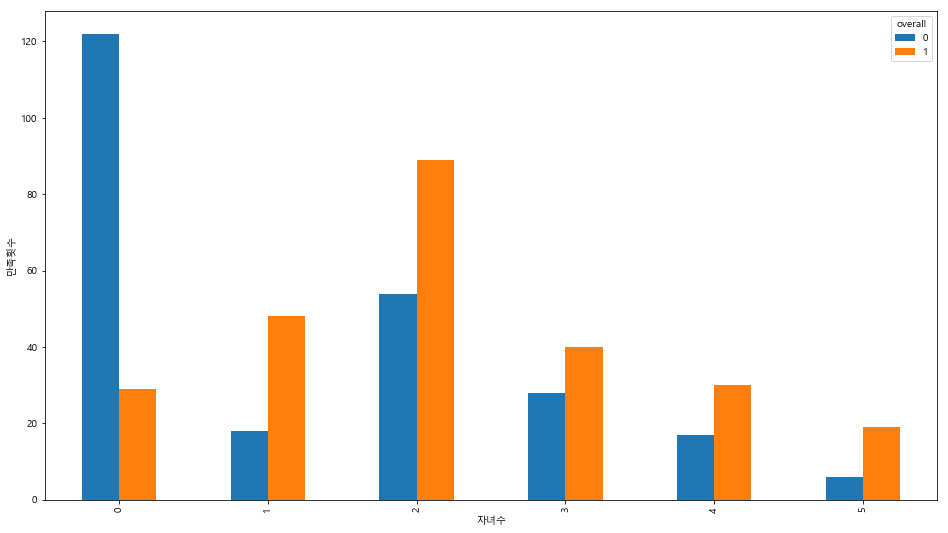

In [11]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["num.child"],df.overall).plot(kind="bar")
plt.xlabel("자녀수")
plt.ylabel("만족횟수")

Text(0, 0.5, '만족횟수')

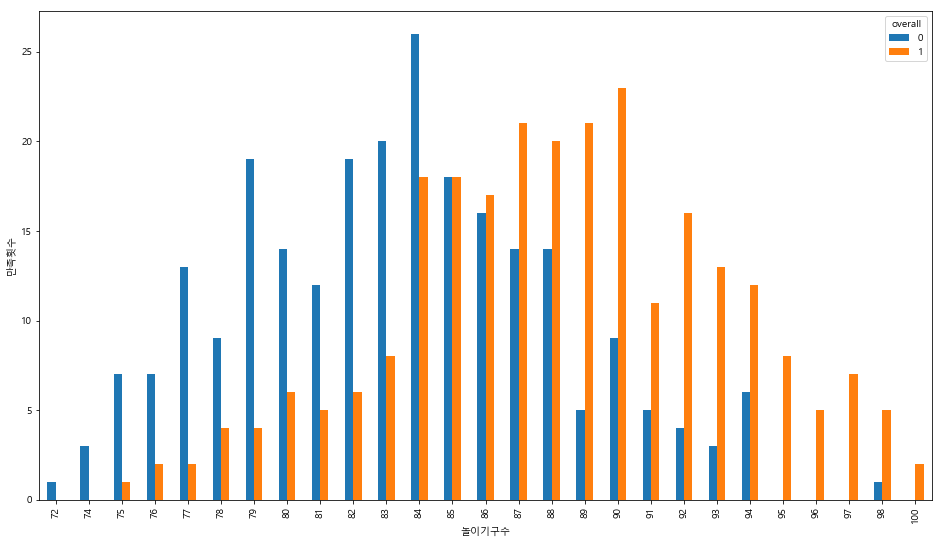

In [12]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["rides"],df.overall).plot(kind="bar")
plt.xlabel("놀이기구수")
plt.ylabel("만족횟수")

Text(0, 0.5, '만족횟수')

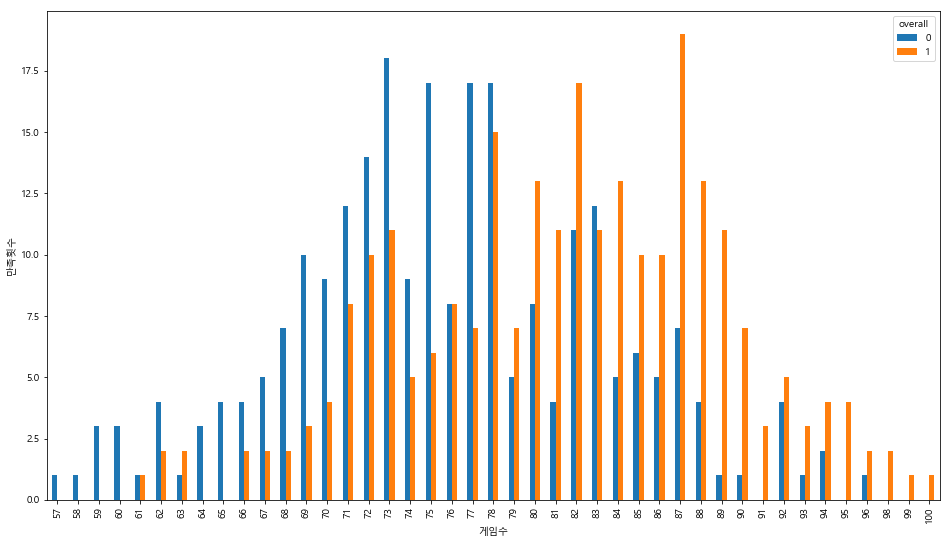

In [13]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["games"],df.overall).plot(kind="bar")
plt.xlabel("게임수")
plt.ylabel("만족횟수")

Text(0, 0.5, '만족횟수')

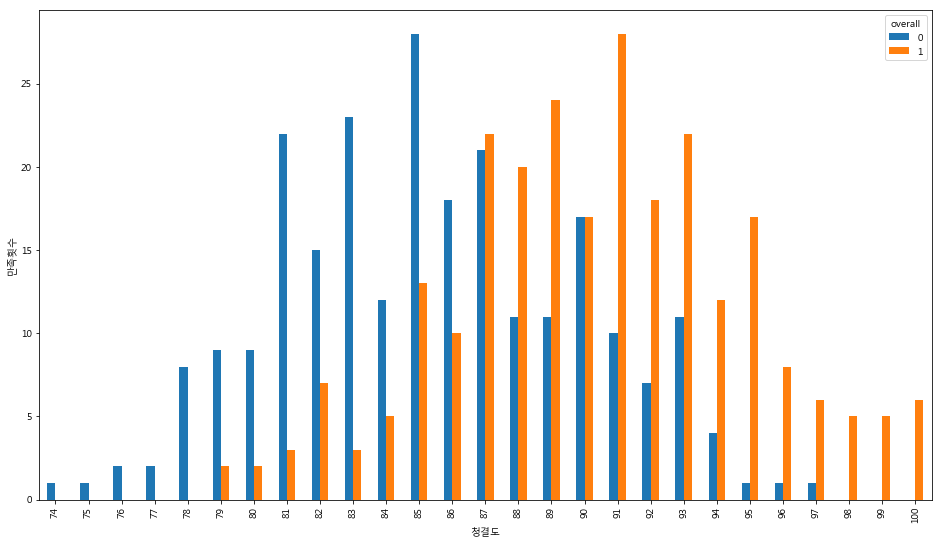

In [15]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["clean"],df.overall).plot(kind="bar")
plt.xlabel("청결도")
plt.ylabel("만족횟수")

In [14]:
df["overall"].value_counts()

1    255
0    245
Name: overall, dtype: int64

Text(0.5, 1.0, '분류\n(0: 만족, 1:불만족)')

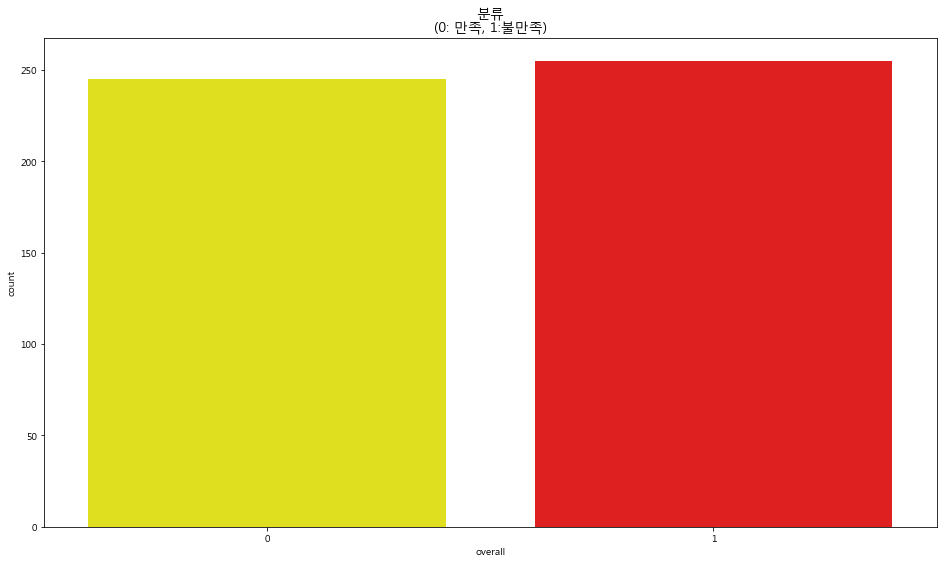

In [17]:
import seaborn as sns

colors=["yellow","red"]
sns.countplot("overall",data=df,palette=colors)
plt.title("분류\n(0: 만족, 1:불만족)",fontsize=14)

In [15]:
train_cols=df.columns[0:7]
X=df[train_cols] #독립변수
y=df["overall"] #종속변수

In [16]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["overall"])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [17]:
df_samp["overall"].value_counts()

1    245
0    245
Name: overall, dtype: int64

In [18]:
X=df_samp[train_cols]
y=df_samp["overall"]

In [19]:
import statsmodels.api as sm

model=sm.Logit(y,X)
result=model.fit()
result.summary2()
#모델의 설명력 12.7%
#유의하지 않은 변수들
#변수의 중요도

Optimization terminated successfully.
         Current function value: 0.605170
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: overall          AIC:              607.0664  
Date:               2019-08-22 10:53 BIC:              636.4272  
No. Observations:   490              Log-Likelihood:   -296.53   
Df Model:           6                LL-Null:          -339.64   
Df Residuals:       483              LLR p-value:      1.8462e-16
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
weekend       -0.3319    0.1984  -1.6730  0.0943  -0.7207   0.0569
num.child      0.4612    0.0714   6.4567  0.0000   0.3212   0.6011
distance       0.0010    0.0031   0.3160  0.7520  -0.0052   0.0072
rides          0.0004    0.0290   0.0128  0.9898  -0.0565   0.0573
games          0.0149    0.0144   1.0357  0.3004  -0.0133   0.0432
wait           0.0621    0.0107   5.7974  0.0000   0.0411   0.0831
clean         -0.0699    0.0308  -2.2685  0.0233  -0.1302  -0.0095
=================================================================

"""

In [20]:
#후진제거법 : 가장 성능이 좋지 않은 변수를 1개씩 제거, rides변수 제거
X=df_samp[["weekend","num.child","distance","games","wait","clean"]]
y=df_samp["overall"]

In [21]:
model=sm.Logit(y,X)
result=model.fit()
result.summary2()
#모델의 설명력 12.7%
#유의하지 않은 변수들
#변수의 중요도

Optimization terminated successfully.
         Current function value: 0.605170
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: overall          AIC:              605.0665  
Date:               2019-08-22 10:54 BIC:              630.2330  
No. Observations:   490              Log-Likelihood:   -296.53   
Df Model:           5                LL-Null:          -339.64   
Df Residuals:       484              LLR p-value:      4.1812e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
weekend       -0.3319    0.1984  -1.6731  0.0943  -0.7207   0.0569
num.child      0.4611    0.0714   6.4618  0.0000   0.3213   0.6010
distance       0.0010    0.0031   0.3159  0.7521  -0.0052   0.0072
games          0.0150    0.0143   1.0422  0.2973  -0.0132   0.0431
wait           0.0621    0.0107   5.7983  0.0000   0.0411   0.0831
clean         -0.0695    0.0148  -4.6941  0.0000  -0.0985  -0.0405
=================================================================

"""

In [25]:
#distance 변수 제거
X=df_samp[["weekend","num.child","games","wait","clean"]]
y=df_samp["overall"]

In [26]:
model=sm.Logit(y,X)
result=model.fit()
result.summary2()
#모델의 설명력 12.7%
#유의하지 않은 변수들
#변수의 중요도

Optimization terminated successfully.
         Current function value: 0.605272
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: overall          AIC:              603.1666  
Date:               2019-07-23 16:01 BIC:              624.1386  
No. Observations:   490              Log-Likelihood:   -296.58   
Df Model:           4                LL-Null:          -339.64   
Df Residuals:       485              LLR p-value:      8.7865e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
weekend       -0.3374    0.1976  -1.7072  0.0878  -0.7247   0.0500
num.child      0.4612    0.0714   6.4610  0.0000   0.3213   0.6011
games          0.0150    0.0144   1.0436  0.2967  -0.0132   0.0431
wait           0.0621    0.0107   5.7976  0.0000   0.0411   0.0831
clean         -0.0691    0.0148  -4.6835  0.0000  -0.0981  -0.0402
=================================================================

"""

In [22]:
#games 변수 제거
X=df_samp[["weekend","num.child","wait","clean"]]
y=df_samp["overall"]

In [23]:
model=sm.Logit(y,X)
result=model.fit()
result.summary2()
#모델의 설명력 12.5%(오히려 성능이 떨어지므로 중지)
#유의하지 않은 변수들
#변수의 중요도

Optimization terminated successfully.
         Current function value: 0.606386
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.125     
Dependent Variable: overall          AIC:              602.2581  
Date:               2019-08-22 10:54 BIC:              619.0357  
No. Observations:   490              Log-Likelihood:   -297.13   
Df Model:           3                LL-Null:          -339.64   
Df Residuals:       486              LLR p-value:      2.5618e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
weekend       -0.3395    0.1974  -1.7195  0.0855  -0.7265   0.0475
num.child      0.4632    0.0714   6.4875  0.0000   0.3233   0.6032
wait           0.0636    0.0106   5.9851  0.0000   0.0428   0.0845
clean         -0.0570    0.0089  -6.4308  0.0000  -0.0743  -0.0396
=================================================================

"""

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model=LogisticRegression()
model.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7372448979591837
0.7551020408163265


In [27]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
cm

array([[31, 12],
       [12, 43]], dtype=int64)

In [28]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,31,12
1,12,43


In [29]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

NameError: name 'sns' is not defined